In [35]:
#import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as axes
from scipy.stats import linregress

# House Value vs Income

In [32]:
#read in csv
zillow_metro_df = pd.read_csv("Output/zillow_census_metro.csv")
zillow_suburb_df = pd.read_csv("Output/zillow_census_suburb.csv")

#combine dfs to one dataset
zillow_combined_df = zillow_metro_df.append(zillow_suburb_df)
                                        
zillow_combined_df = zillow_combined_df.sort_values(by=["HomeValue","Household Income"])

zillow_metro_df = zillow_metro_df.sort_values(by=["HomeValue","Household Income"])

zillow_metro_df.head()


,RegionName,StateName,City,Metro,CountyName,HomeValue,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
21806,24724,WV,Bramwell,Bluefield,Mercer County,16013.0,107.0,45.1,56250.0,15775.0,2.0,1.869159
19155,24736,WV,Lashmeet,Bluefield,Mercer County,16417.0,584.0,50.8,30833.0,17551.0,122.0,20.890411
12090,17948,PA,Mahanoy City,Pottsville,Schuylkill County,18117.0,4677.0,36.7,38203.0,20241.0,1232.0,26.341672
20737,25142,WV,Alum Creek,Charleston,Kanawha County,19316.0,486.0,43.3,55000.0,21414.0,88.0,18.106996
6498,48505,MI,Flint,Flint,Genesee County,20289.0,20327.0,34.6,25949.0,14495.0,8481.0,41.722832


R value is 0.6322946400845411


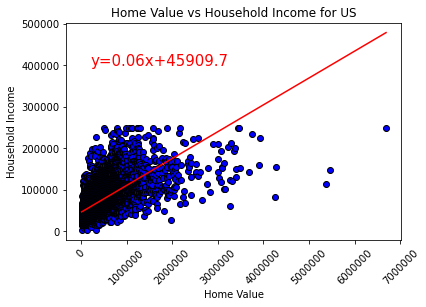

In [48]:
#plot total data
fig, ax = plt.subplots()
total_plot = plt.scatter(zillow_combined_df["HomeValue"],zillow_combined_df["Household Income"],marker="o",color="blue",edgecolors="black")
(slope,intercept,rvalue,pvalue,stderr) = linregress(zillow_combined_df["HomeValue"],zillow_combined_df["Household Income"])
regress_values = zillow_combined_df["HomeValue"]*slope + intercept
line_eq = "y=" +str(round(slope,2))+ "x+" +str(round(intercept,2))
ax.plot(zillow_combined_df["HomeValue"],regress_values,"r-")
ax.ticklabel_format(useOffset=False,style='plain')
plt.xticks(rotation=45)
plt.xlabel("Home Value")
plt.ylabel("Household Income")
plt.title("Home Value vs Household Income for US")
plt.annotate(line_eq, (200000,400000),fontsize=15,color="red")
print(f"R value is {rvalue}")

R value is 0.6219785137089929


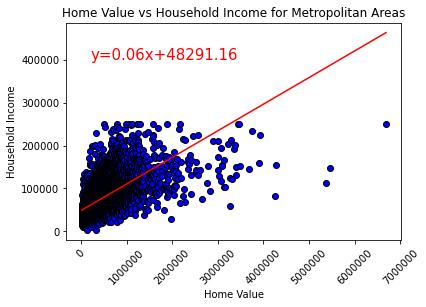

In [47]:
#plot metro data
fig, ax = plt.subplots()
metro_plot = plt.scatter(zillow_metro_df["HomeValue"],zillow_metro_df["Household Income"],marker="o",color="blue",edgecolors="black")
(slope,intercept,rvalue,pvalue,stderr) = linregress(zillow_metro_df["HomeValue"],zillow_metro_df["Household Income"])
regress_values = zillow_metro_df["HomeValue"]*slope + intercept
line_eq = "y=" +str(round(slope,2))+ "x+" +str(round(intercept,2))
ax.plot(zillow_metro_df["HomeValue"],regress_values,"r-")
ax.ticklabel_format(useOffset=False,style='plain')
plt.xticks(rotation=45)
plt.xlabel("Home Value")
plt.ylabel("Household Income")
plt.title("Home Value vs Household Income for Metropolitan Areas")
plt.annotate(line_eq, (200000,400000),fontsize=15,color="red")
print(f"R value is {rvalue}")


In [6]:
#plot atlanta data
atl_df = zillow_combined_df.loc[zillow_combined_df["Metro"]=="Atlanta-Sandy Springs-Roswell",:]
atl_df.sort_values(by = ["HomeValue"])


,RegionName,StateName,City,Metro,CountyName,HomeValue,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
11254,31816,GA,Manchester,Atlanta-Sandy Springs-Roswell,Meriwether County,65599.0,5271.0,40.7,36942.0,23254.0,1090.0,20.679188
16244,30216,GA,Flovilla,Atlanta-Sandy Springs-Roswell,Butts County,91725.0,2361.0,36.0,38329.0,18918.0,599.0,25.370606
14236,30293,GA,Woodbury,Atlanta-Sandy Springs-Roswell,Meriwether County,99397.0,2609.0,49.1,28750.0,19268.0,700.0,26.830203
12269,30222,GA,Greenville,Atlanta-Sandy Springs-Roswell,Meriwether County,107589.0,4089.0,41.8,32983.0,17696.0,1125.0,27.512839
4907,30297,GA,Forest Park,Atlanta-Sandy Springs-Roswell,Clayton County,109103.0,28966.0,30.4,36480.0,15459.0,7251.0,25.032797
...,...,...,...,...,...,...,...,...,...,...,...,...
4836,30307,GA,Atlanta,Atlanta-Sandy Springs-Roswell,Fulton County,571794.0,20036.0,37.4,105912.0,71222.0,1969.0,9.827311
712,30319,GA,Brookhaven,Atlanta-Sandy Springs-Roswell,Dekalb County,602463.0,43011.0,36.8,104435.0,75567.0,2988.0,6.947060
2479,30342,GA,Sandy Springs,Atlanta-Sandy Springs-Roswell,Fulton County,664498.0,30873.0,33.4,91740.0,78719.0,2331.0,7.550287
3532,30306,GA,Atlanta,Atlanta-Sandy Springs-Roswell,Fulton County,754452.0,23973.0,35.2,108973.0,85547.0,1965.0,8.196721


R value is 0.7907298736315531


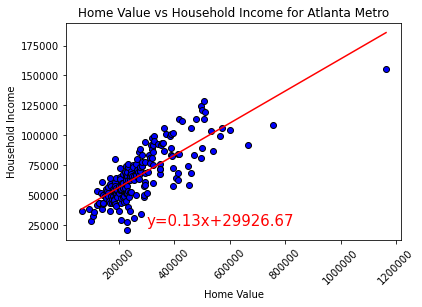

In [46]:
fig, ax = plt.subplots()
total_plot = plt.scatter(atl_df["HomeValue"],atl_df["Household Income"],marker="o",color="blue",edgecolors="black")
(slope,intercept,rvalue,pvalue,stderr) = linregress(atl_df["HomeValue"],atl_df["Household Income"])
regress_values = atl_df["HomeValue"]*slope + intercept
line_eq = "y=" +str(round(slope,2))+ "x+" +str(round(intercept,2))
ax.plot(atl_df["HomeValue"],regress_values,"r-")
plt.xticks(rotation=45)
plt.xlabel("Home Value")
plt.ylabel("Household Income")
plt.title("Home Value vs Household Income for Atlanta Metro")
ax.ticklabel_format(useOffset=False,style='plain')
plt.annotate(line_eq, (300000,25000),fontsize=15,color="red")
print(f"R value is {rvalue}")